In [41]:
import pandas as pd
import numpy as np
from numpy.random import randint, rand
import matplotlib.pyplot as plt

class Person:
    def __init__(self):
        self.infected = False
        self.ss = randint(0,3)
        self.mask = 0
        self.heal = 0
        self.fragility = randint(0,10)
        self.alive = 1
        self.imm = randint(0,2)
    def infection(self):
        self.infected = True
    def healed(self):
        self.infected = False
    def death(self):
        self.alive = 0
    def immunity(self):
        self.imm = 5
        self.infected = False
    def variant1(self):
        self.imm=2
    def variant2(self):
        self.imm=4
        
N=500
p=0.5
k=20

In [42]:
pop = [Person() for i in range(N)]

def patientzero():
    pop[0].infection()
    pop[0].ss = 1
    pop[0].mask = 0

In [45]:
def model():    
    t=0
    c=0
    d=0
    x=0.5
    y=8  #fragility
    p=0.5  #probability of catching it
    count= []
    countd=[]
    time=[]
    while t < 100:    
        for i in range (N):
            if pop[i].alive == 1:
                if pop[i].infected == True:
                    if pop[i].ss < 5:
                        if pop[i].mask == 0:
                            contacts = randint(N, size=k)
                            for j in contacts:
                                if pop[j].imm < p and pop[j].ss < 5 and pop[j].alive == 1 and pop[j].mask == 0:
                                    pop[j].infection()
                                    if pop[j].fragility < y:
                                        pop[j].heal = pop[i].heal + 1
                                        if pop[j].heal > 20:   #transmission time in host
                                            pop[j].healed()
                                            pop[j].heal=0
                                            pop[j].immunity()
                                    if pop[j].fragility >= y:
                                        if pop[j].infected == True:
                                            pop[j].death()
                                    if pop[j].imm > 0.1:
                                        pop[j].imm = pop[k].imm - x #how quicly u lose immunity
                                    
                    if pop[i].fragility < y:
                        pop[i].heal = pop[i].heal + 1
                        if pop[i].heal > 20:
                            pop[i].healed()
                            pop[i].heal=0
                            pop[i].immunity()
                    if pop[i].fragility >= y:
                        if pop[i].infected == True:
                            pop[i].death()
                if pop[i].imm > 0.1:
                    pop[i].imm = pop[i].imm - x
                   
                
        t = t +1
        #print('time',t)
        c=0
        d=0
        for i in range (N):
            if pop[i].infected == True:
                c=c+1
           
            
            if pop[i].alive == 0:
                d=d+1
        if t == 25:
            pop[0].infection()
            pop[0].fragility = 0
            pop[0].ss = 1
            pop[0].mask = 0
            pop[0].imm =0
            p = p + p**0.0000000000000001   #increase in virus virulence
            for i in range(N):
                pop[i].variant1()
            x=0.1 #factor of deacrese in immunity
            y=7 #deadliness of new variant, the lower the dedlier
        if t == 60:
            pop[0].infection()
            pop[0].fragility = 0
            pop[0].ss = 1
            pop[0].mask = 0
            pop[0].imm =0
            for i in range(N):
                pop[i].variant2()
            p = p + p**0.0000000000000001  
            x=0.5
            y=6 #stenght of new variant, the lower the dedlier
        #print(p)
        #print(pop[10].imm)
        #print(y)
        count.append(c)        
   
        countd.append(d)
    
        time.append(t)
        #plt.plot(time, count)
    
        #plt.plot(time, countd, color='red')
        #plt.show()
        #if 500 in count:
            #break
#print(countd)
#print(count)
    plt.plot(time, count)
    plt.plot(time, countd, color='red')
    plt.show()

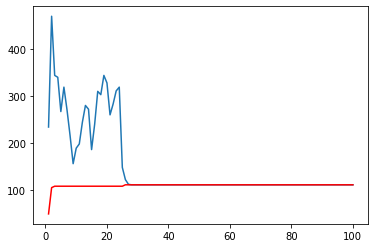

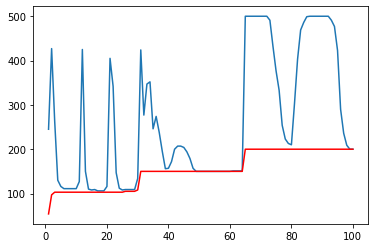

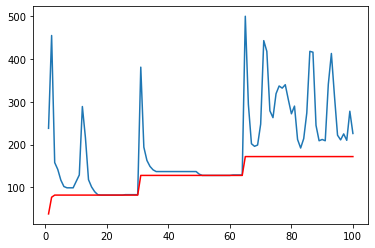

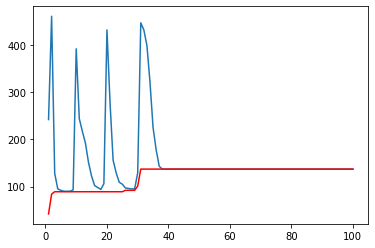

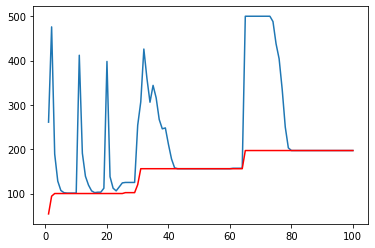

In [46]:
t=0
c=0
d=0
x=0.5
y=8
p=0.5
count= []
countd=[]
time=[]
for l in range (5):
    t=0
    c=0
    d=0
    x=0.5
    y=8
    p=0.5
    count= []
    countd=[]
    time=[]
    for i in range(N):
        pop[i].__init__()
        patientzero()
    
    model()

In [ ]:
t=0
c=0
d=0
x=0.5
y=8
count= []
countd=[]
time=[]
for l in range (5):
    t=0
    c=0
    d=0
    x=0.5
    y=8
    p=0.5
    count= []
    countd=[]
    time=[]
    for i in range(N):
        pop[i].__init__()
        patientzero()
    while t < 100:    
        for i in range (N):
            if pop[i].alive == 1:
                if pop[i].infected == True:
                    if pop[i].ss < 5:
                        if pop[i].mask == 0:
                            contacts = randint(N, size=k)
                            for j in contacts:
                                 if pop[j].imm < p and pop[j].ss < 5 and pop[j].alive == 1 and pop[j].mask == 0:
                                    pop[j].infection()
                    if pop[i].fragility < y:
                        pop[i].heal = pop[i].heal + 1
                        if pop[i].heal > 7:
                            pop[i].healed()
                            pop[i].heal=0
                            pop[i].immunity()
                    if pop[i].fragility >= y:
                        if pop[i].infected == True:
                            pop[i].death()
                if pop[i].imm > 0.1:
                    pop[i].imm = pop[i].imm - x
                   
                
        t = t +1
        
        c=0
        d=0
        for i in range (N):
            if pop[i].infected == True:
                c=c+1
           
            
            if pop[i].alive == 0:
                d=d+1
        if t == 25:
            pop[0].infection()
            pop[0].fragility = 0
            pop[0].ss = 1
            pop[0].mask = 0
            pop[0].imm =0
            p = p + p**0.0000000000000001   
            for i in range(N):
                pop[i].variant1()
            x=0.1
            y=6
        if t == 60:
            pop[0].infection()
            pop[0].fragility = 0
            pop[0].ss = 1
            pop[0].mask = 0
            pop[0].imm =0
            for i in range(N):
                pop[i].variant2()
            p = p + p**0.0000000000000001  
            x=0.1
            y=2
        
        count.append(c)        
   
        countd.append(d)
    
        time.append(t)
        
        if 500 in count:
            break
    
    plt.plot(time, count)
    plt.plot(time, countd, color='red')
    plt.show()
    print(p)
print(countd)
print(count)


